### KNN Algorithm
https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

### Data Preprocessing

In [1]:
import matplotlib.pyplot as plt     # For general visualizations
import seaborn as sns               # Much better visualizations
import numpy as np                  # For mathematical operations
import pandas as pd                 # For working with .csv file
import time                         # Python time library

from pandas import Series, DataFrame

In [2]:
# importing data
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')

In [3]:
df.head(-10) # returns the first 5 and last 5 rows from the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.12790,...,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.10430,...,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,22.88,67.88,347.3,0.1265,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969,NaN


In [4]:
df.shape

(569, 33)

In [5]:
# Setting diagnosis column as our target varible
y_target = df.diagnosis

# Counting the 'B' & 'M'
y_target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# Changing the target values from string to binary numbers

'''
when the target values == 'M' --True --  it will change target value to binary 0
& when the target value is false i.e. 'B' it will change it to binary 1
'''
y_target = np.where(y_target.values == 'M', 0, 1)

In [7]:
# dropping off unwanted columns
list = ['Unnamed: 32', 'id', 'diagnosis']
df = df.drop(list,axis = 1)
df.shape

(569, 30)

In [8]:
from sklearn.preprocessing import MinMaxScaler  

`MinMaxScaler` rescales the data set such that all feature values are in the range [0, 1]

In [9]:
# Data Normalisation
scaler = MinMaxScaler()

In [10]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


`Not normalized`

In [11]:
# fit: train any model in sklearn library
# transform: scales the data
df = scaler.fit_transform(df) 
df

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

`Normalized`: as the gap between data is reduced now

### Splitting data into training and testing datasets

In [12]:
from sklearn.model_selection import train_test_split  

`Scikit-learn` (sklearn) library provides tools for clasification, linear regression, clustering and dimensionality reduction in Python.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y_target, test_size = 0.3) # 30% of data appointed to test dataset
# X is features, target is y

In [14]:
print(df.shape)
print(X_test.shape)
print(X_train.shape)

(569, 30)
(171, 30)
(398, 30)


171 elements in test dataset and 398 in training dataset.

#### KNN 

In [15]:
# importing the KNN from the Sklearn library
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

`[5,7,11,15]`: set of possible values (K) that hyper-parameter can take. KNN model will be trained for each value in the grid. 3-NN,5-NN and so on. After we have gone through the entire grid we will select the value that gave the best performance.

In [17]:
from sklearn.model_selection import GridSearchCV

# Creating parameter grid
param_grid = {'n_neighbors': [5, 7, 11, 15],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 30, 50, 100]}

grid_search = GridSearchCV(knn, param_grid = param_grid)

1. `GridSearchCV` is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. The model and the parameters are required to be fed in. Best parameter values are extracted. 

In [18]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 30, 50, 100],
                         'n_neighbors': [5, 7, 11, 15]})

In [19]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=15)

In [20]:
# Using the best set of parameter from the grid search
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
# fitting the knn parameters
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10)

### Model Evaluation

#### 1. Accuracy

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
predict = knn.predict(X_test)

In [24]:
print("Accuracy: {}%".format(accuracy_score(y_test,predict)*100))

Accuracy: 98.24561403508771%


#### 2. Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
matrix= confusion_matrix(y_test, predict)

<AxesSubplot:>

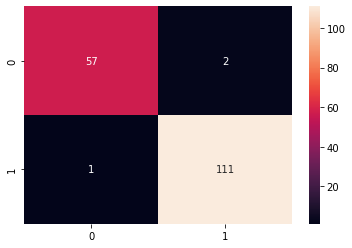

In [27]:
sns.heatmap(matrix,annot = True, fmt = "d")

#### 3. Precision Score

In [28]:
from sklearn.metrics import precision_score

In [29]:
precision = precision_score(y_test, predict)

In [30]:
print("Precision: ", precision)

Precision:  0.9823008849557522


#### 4. Recall

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall = recall_score(y_test, predict)

In [33]:
print("Recall: ", recall)

Recall:  0.9910714285714286


Feature selection is not done here. All features are considered hence `overfitting` must have occured. As real time execution of KNN is much expensive, it wil be better to implement `Random Forest` algorithm. Thus I will implement the said algorithm after selecting features and evaluate the model further.